In [ ]:
# Importing packages
import numpy as np
import pandas as pd

In [ ]:
# Importing data
df_train = pd.read_csv('InsNova_train.csv')
df_test = pd.read_csv('InsNova_test.csv')
df_train['log_veh_value'] = np.log(df_train['veh_value'])
print(df_train.shape, df_test.shape)

(22610, 12) (22629, 8)


C:\Users\gursk\anaconda3\envs\travelers\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# Training data EDA
df_train.isna().mean()

id               0.0
veh_value        0.0
exposure         0.0
veh_body         0.0
veh_age          0.0
gender           0.0
area             0.0
dr_age           0.0
claim_ind        0.0
claim_count      0.0
claim_cost       0.0
log_veh_value    0.0
dtype: float64

In [ ]:
# Do we have multiple records per id?
df_train['id'].value_counts().sort_values(ascending=False)

32768    1
50356    1
59421    1
22555    1
26685    1
        ..
53083    1
53238    1
49144    1
14329    1
2047     1
Name: id, Length: 22610, dtype: int64

In [ ]:
# Looking at responses
df_train['claim_ind'].value_counts()

0    21076
1     1534
Name: claim_ind, dtype: int64

In [ ]:
print(df_train['claim_count'].value_counts())
print(df_train['claim_count'].mean())
print(df_train['claim_count'].var())

0    21076
1     1443
2       88
3        3
Name: claim_count, dtype: int64
0.07200353825740823
0.07540263787504708


count    22610.000000
mean       140.007568
std       1123.338125
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      57895.584560
Name: claim_cost, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


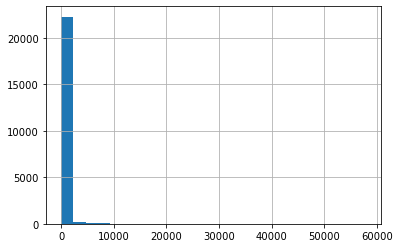

In [ ]:
print(df_train['claim_cost'].describe())
print(df_train['claim_cost'].hist(bins=25))

In [ ]:
df_train_losses = df_train[df_train['claim_ind'] == 1].drop(['id', 'claim_ind'], axis=1)
df_train_losses.corr()
# Notable finds
# veh_value : veh_age negative
# exposure: claim_cost negative
# Note that much else for strong relationships

,veh_value,exposure,veh_age,dr_age,claim_count,claim_cost,log_veh_value
veh_value,1.000000,0.057004,-0.551289,-0.037981,-0.033000,0.007717,0.913880
exposure,0.057004,1.000000,-0.003200,0.045346,0.091385,-0.138055,0.084378
veh_age,-0.551289,-0.003200,1.000000,0.008633,0.014590,0.061662,-0.625483
dr_age,-0.037981,0.045346,0.008633,1.000000,0.026972,-0.072284,-0.062846
claim_count,-0.033000,0.091385,0.014590,0.026972,1.000000,0.066965,-0.021701
claim_cost,0.007717,-0.138055,0.061662,-0.072284,0.066965,1.000000,-0.003612
log_veh_value,0.913880,0.084378,-0.625483,-0.062846,-0.021701,-0.003612,1.000000


<AxesSubplot:title={'center':'claim_cost'}, xlabel='dr_age'>

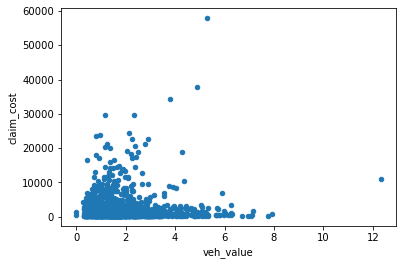

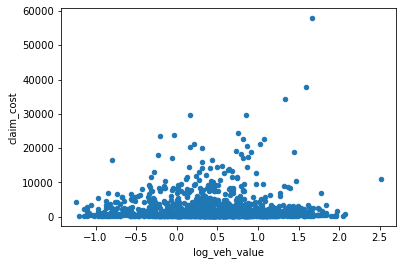

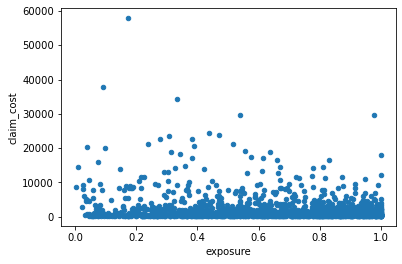

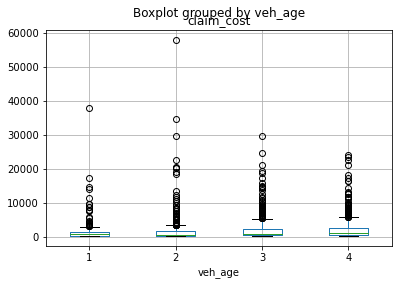

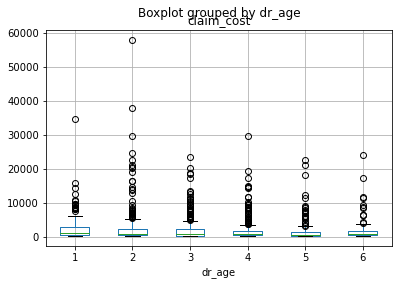

In [ ]:
# Analyzing univariate relationships
df_train_losses.plot.scatter('veh_value', 'claim_cost')
df_train_losses.plot.scatter('log_veh_value', 'claim_cost')
df_train_losses.plot.scatter('exposure', 'claim_cost')
df_train_losses.boxplot('claim_cost', by='veh_age')
df_train_losses.boxplot('claim_cost', by='dr_age')